In [2]:
!pip install opendatasets

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sathiskasasindu
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight


100%|██████████| 20.3k/20.3k [00:00<00:00, 9.85MB/s]

In [5]:
data = pd.read_csv("/content/male-female-height-and-weight/Test set.csv")

In [6]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [9]:
data.loc[data['Sex'] == 'Male','Sex'] = 1
data.loc[data['Sex'] == 'Female','Sex'] = 0

In [10]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [11]:
x = data.drop(['Sex'],axis= 1)
y = data['Sex']

### Normalize Data set

In [47]:
# using normalization then we can improve performance in our model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled , columns=['Height','Weight'])

In [48]:
x.head()

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [49]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [50]:
# change the y data type
y = y.astype('int')

In [51]:
y.dtype

dtype('int64')

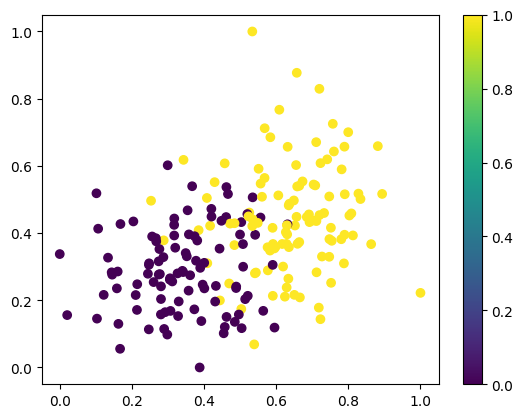

In [52]:
plt.scatter(x['Height'],x['Weight'] , c=y)
plt.colorbar()
plt.show()

In [53]:
# train data set and test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [54]:
x_train.shape,x_test.shape

((164, 2), (41, 2))

In [55]:
data.shape

(205, 3)

### Model Building

In [56]:
# Create the model
model = tf.keras.Sequential([
    # Create hidden layer
    tf.keras.layers.Dense(64, activation='relu',input_shape=(2,)),  # Dense -> fully connected layers
    tf.keras.layers.Dense(16, activation='relu'),
    # Create output layer
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])


# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.005),
    metrics=["accuracy"]
)


# Train the model
# expand_dims -> use to
epoch_number = 20
history = model.fit(x_train, y_train, epochs=epoch_number)

Epoch 1/20
6/6 [==============================] - 1s 3ms/step - loss: 0.6838 - accuracy: 0.4695
Epoch 2/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6602 - accuracy: 0.5244
Epoch 3/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.5427
Epoch 4/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6163 - accuracy: 0.6098
Epoch 5/20
6/6 [==============================] - 0s 3ms/step - loss: 0.5852 - accuracy: 0.7256
Epoch 6/20
6/6 [==============================] - 0s 3ms/step - loss: 0.5477 - accuracy: 0.7744
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.8232
Epoch 8/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.8354
Epoch 9/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4023 - accuracy: 0.8415
Epoch 10/20
6/6 [==============================] - 0s 3ms/step - loss: 0.3667 - accuracy: 0.8598
Epoch 11/20
6/6 [======================

In [57]:
# see model summery
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                192       
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1249 (4.88 KB)
Trainable params: 1249 (4.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate Model

In [58]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.2708 - accuracy: 0.9024


[0.27082228660583496, 0.9024389982223511]

In [59]:
# see prediction
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


In [60]:
y_pred[:5]

array([[0.1389878 ],
       [0.97271895],
       [0.9874718 ],
       [0.28431645],
       [0.96334565]], dtype=float32)

In [61]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

### Performance messure

In [75]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test,y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9>

In [63]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>

<Axes: >

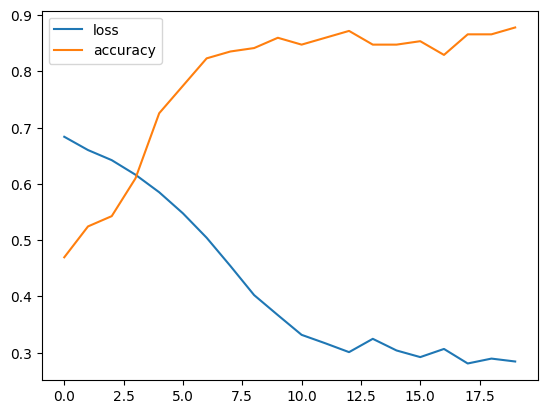

In [64]:
pd.DataFrame(history.history).plot()

### Multi Class Classification Problem

In [65]:
# Create the model
model = tf.keras.Sequential([
    # Create hidden layer
    tf.keras.layers.Dense(64, activation='relu',input_shape=(2,)),  # Dense -> fully connected layers
    tf.keras.layers.Dense(16, activation='relu'),
    # Create output layer
    tf.keras.layers.Dense(2,activation = 'softmax')
])


# Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.005),
    metrics=["accuracy"]
)


# Train the model
# expand_dims -> use to
epoch_number = 20
history = model.fit(x_train, y_train, epochs=epoch_number)

Epoch 1/20
6/6 [==============================] - 1s 3ms/step - loss: 0.7135 - accuracy: 0.4146
Epoch 2/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.5305
Epoch 3/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.5366
Epoch 4/20
6/6 [==============================] - 0s 4ms/step - loss: 0.6393 - accuracy: 0.5854
Epoch 5/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6101 - accuracy: 0.6646
Epoch 6/20
6/6 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.7683
Epoch 7/20
6/6 [==============================] - 0s 3ms/step - loss: 0.5374 - accuracy: 0.8293
Epoch 8/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4945 - accuracy: 0.7927
Epoch 9/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4572 - accuracy: 0.7988
Epoch 10/20
6/6 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8354
Epoch 11/20
6/6 [======================

In [67]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                192       
                                                                 
 dense_13 (Dense)            (None, 16)                1040      
                                                                 
 dense_14 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1266 (4.95 KB)
Trainable params: 1266 (4.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate Model

In [68]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 12ms/step - loss: 0.2737 - accuracy: 0.9024


[0.2737308144569397, 0.9024389982223511]

In [69]:
# see prediction
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 10ms/step


In [73]:
y_pred[:5]

# first column - probabilty of -> 0
#  second column - probability of -> 1

array([[0.95145285, 0.0485471 ],
       [0.08976672, 0.91023326],
       [0.04828302, 0.95171696],
       [0.8408692 , 0.1591308 ],
       [0.183925  , 0.8160751 ]], dtype=float32)

In [71]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int64

In [74]:
import numpy as np
y_pred = np.argmax(y_pred,axis = 1)
y_pred[:5]


array([0, 1, 1, 0, 1])

### Performance messure

In [76]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9>

In [77]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9>

<Axes: >

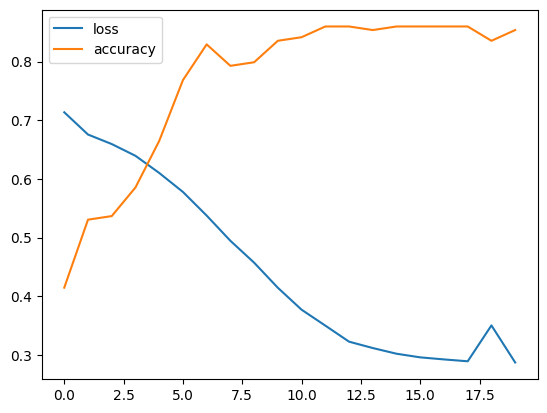

In [78]:
pd.DataFrame(history.history).plot()